<a href="https://colab.research.google.com/github/nvarshi2004/Movie-Recommendation-Ml-project/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
movies = pd.read_csv('movies.csv')  # contains movieId, title, genres
ratings = pd.read_csv('ratings.csv')  # contains userId, movieId, rating, timestamp

In [10]:
movies.size

29226

In [11]:
ratings.size

403344

In [12]:
movies.shape

(9742, 3)

In [13]:
ratings.shape

(100836, 4)

In [14]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
movies.tail(5)

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [18]:
ratings.tail(5)

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [19]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [20]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [21]:
movies.isnull().sum()

,0
movieId,0
title,0
genres,0


In [22]:
ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [23]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [24]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [26]:
# Merge ratings with movie titles
data = pd.merge(ratings, movies, on='movieId')
print(f"Data shape: {data.shape}")
print(data.head())

Data shape: (100836, 6)
   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


In [27]:
# 2. Create User-Movie Matrix
print("\nCreating user-movie matrix...")
user_movie_matrix = data.pivot_table(index='userId', columns='title', values='rating')
print("Matrix sample:")
print(user_movie_matrix.iloc[:5, :5])  # Display a sample


Creating user-movie matrix...
Matrix sample:
title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  'Til There Was You (1997)  
userId                                                                          
1                          NaN                  NaN                        NaN  
2                          NaN                  NaN                        NaN  
3                          NaN                  NaN                        NaN  
4                          NaN                  NaN                        NaN  
5                         

In [30]:
# 3. Compute Cosine Similarity
print("\nFilling missing values and computing user similarity...")
user_movie_filled = user_movie_matrix.fillna(0)
user_similarity = cosine_similarity(user_movie_filled)
# Create a DataFrame for better readability
user_similarity_df = pd.DataFrame(user_similarity,
                                  index=user_movie_filled.index,
                                  columns=user_movie_filled.index)


Filling missing values and computing user similarity...


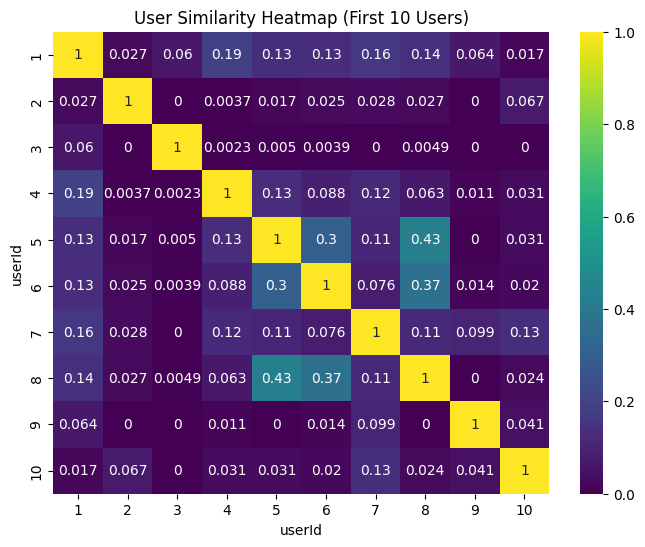

In [31]:
#Visualize similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(user_similarity_df.iloc[:10, :10], cmap="viridis", annot=True)
plt.title("User Similarity Heatmap (First 10 Users)")
plt.show()

In [32]:
#4. Recommendation Function
def recommend_movies(user_id, num_recommendations=5):
    print(f"\nGenerating recommendations for User {user_id}...")

    if user_id not in user_similarity_df:
        print(f"User ID {user_id} not found.")
        return []

    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:]
    weighted_scores = pd.Series(dtype=np.float64)

    for other_user, similarity in similar_users.items():
        other_user_ratings = user_movie_filled.loc[other_user]
        weighted_scores = weighted_scores.add(other_user_ratings * similarity, fill_value=0)

    user_rated = user_movie_filled.loc[user_id]
    weighted_scores = weighted_scores[user_rated == 0]

    top_recommendations = weighted_scores.sort_values(ascending=False).head(num_recommendations)

    print("Recommended movies:")
    for movie, score in top_recommendations.items():
        print(f"  {movie} (score: {score:.2f})")

    return top_recommendations.index.tolist()

In [34]:
# 5. Example Usage
user_id = 6
recommendations = recommend_movies(user_id)


Generating recommendations for User 6...
Recommended movies:
  Toy Story (1995) (score: 132.77)
  Star Wars: Episode IV - A New Hope (1977) (score: 118.19)
  Mission: Impossible (1996) (score: 110.96)
  Matrix, The (1999) (score: 102.83)
  Star Wars: Episode V - The Empire Strikes Back (1980) (score: 93.75)
